Linear Regression MSE: 95.97094009110677
Decision Tree MSE: 93.08258788801548
Random Forest MSE: 31.36175523619488
Support Vector Regressor MSE: 88.95941487206821
KNN MSE: 73.61869240776699
The best model is: Random Forest with MSE: 31.36175523619488
Predicted Strength: [51.0022]


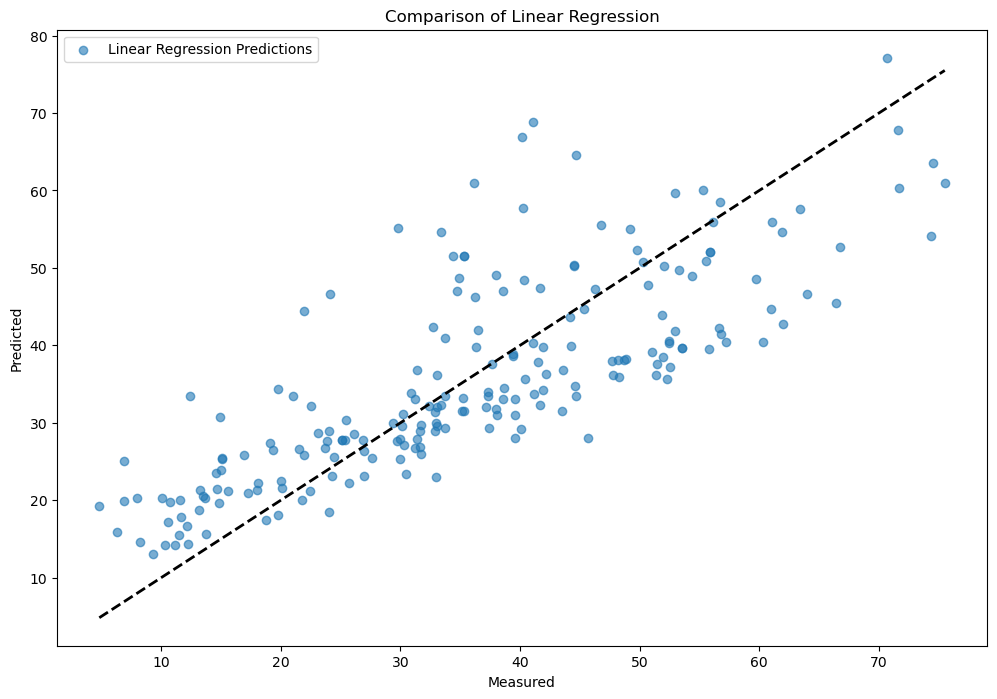

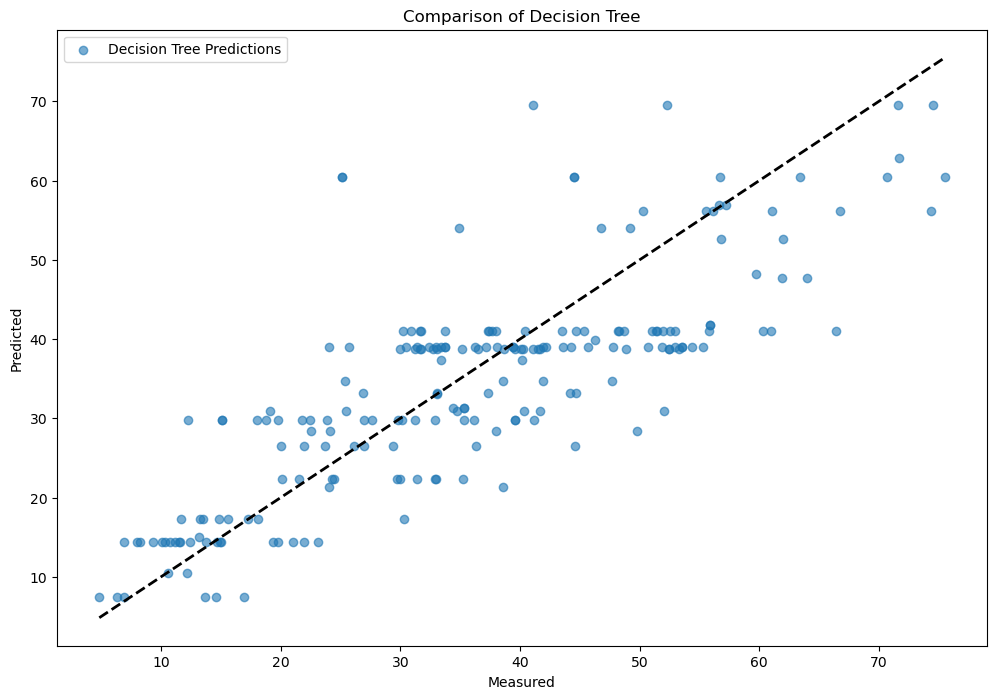

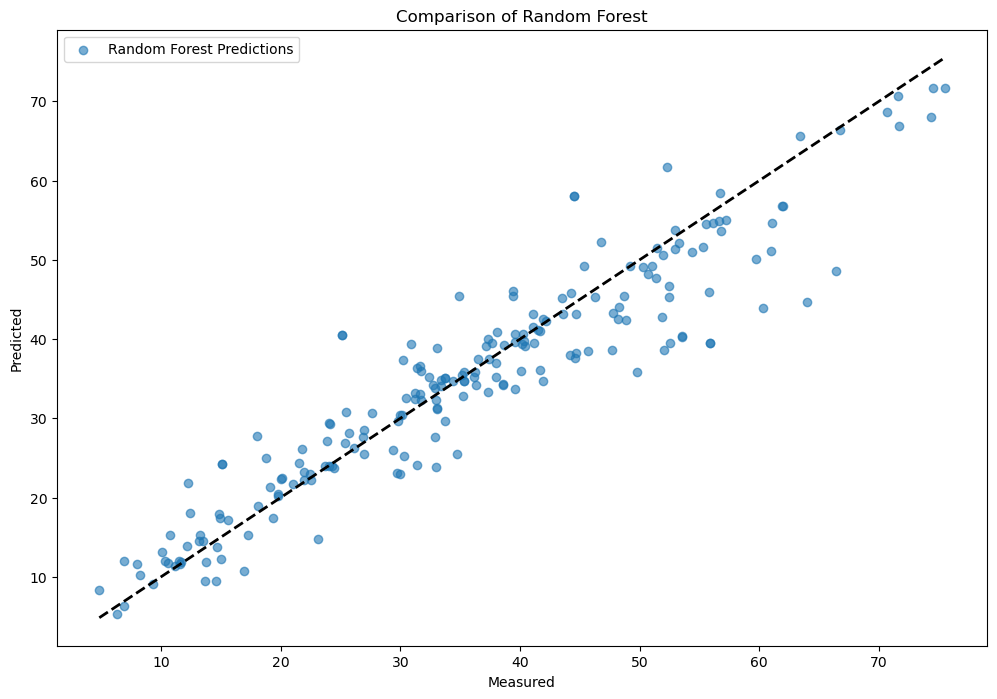

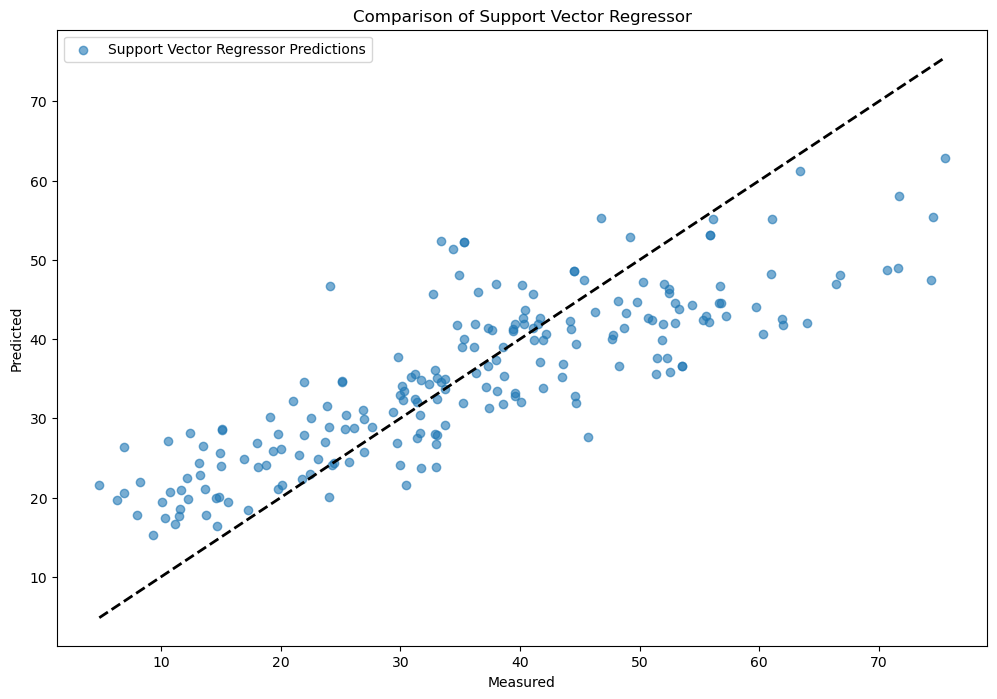

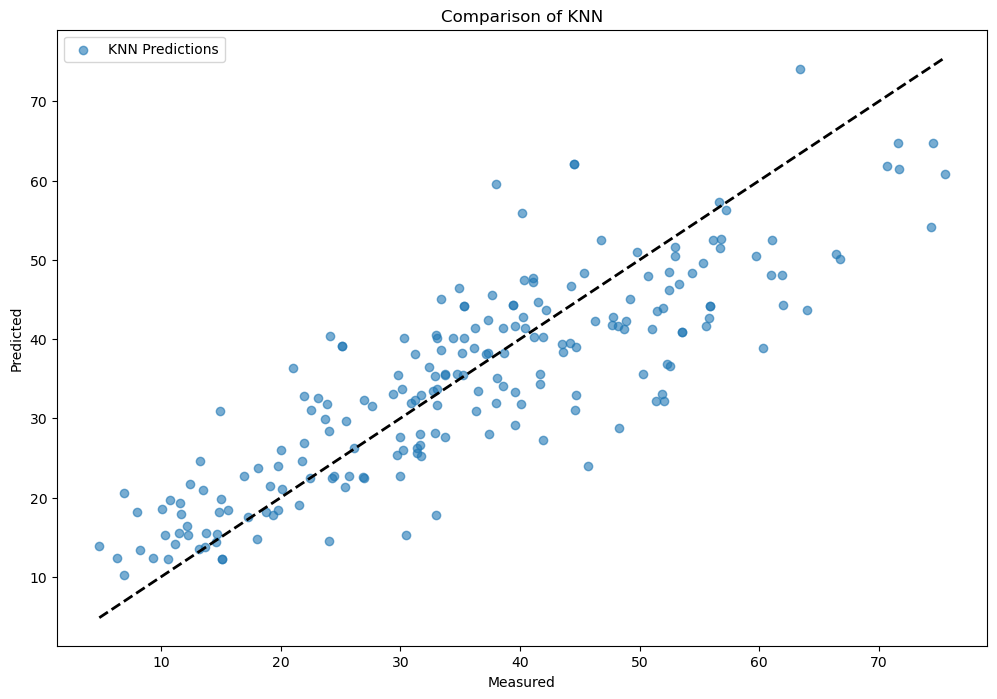

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt
import graphviz
import os

df = pd.read_csv(r"C:\ML COURSE\project\DATASET\Concrete_Data.csv")

df.columns = ['cement', 'slag', 'ash', 'water', 'superplasticizer', 'coarseagg', 'fineagg', 'age', 'strength']

features = ['cement', 'slag', 'ash', 'water', 'superplasticizer', 'coarseagg', 'fineagg', 'age']
target = 'strength'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=5),  
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'KNN': KNeighborsRegressor()
}

results = {}
predictions_dict = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    results[name] = mse
    predictions_dict[name] = predictions
    print(f"{name} MSE: {mse}")

best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

joblib.dump(best_model, 'best_model.pkl')

print(f"The best model is: {best_model_name} with MSE: {results[best_model_name]}")

loaded_model = joblib.load('best_model.pkl')
new_data = pd.DataFrame({
    'cement': [350],
    'slag': [120],
    'ash': [30],
    'water': [180],
    'superplasticizer': [7],
    'coarseagg': [1040],
    'fineagg': [700],
    'age': [28]
})

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
new_data_scaled = scaler.transform(new_data)

predictions = loaded_model.predict(new_data_scaled)
print("Predicted Strength:", predictions)

for name, predictions in predictions_dict.items():
    plt.figure(figsize=(12, 8))
    plt.scatter(y_test, predictions, label=f'{name} Predictions', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.title(f'Comparison of {name}')
    plt.legend()
    plt.show()


In [22]:
X = df[features]
print(X)
print(y)

      cement   slag    ash  water  superplasticizer  coarseagg  fineagg  age
0      540.0    0.0    0.0  162.0               2.5     1040.0    676.0   28
1      540.0    0.0    0.0  162.0               2.5     1055.0    676.0   28
2      332.5  142.5    0.0  228.0               0.0      932.0    594.0  270
3      332.5  142.5    0.0  228.0               0.0      932.0    594.0  365
4      198.6  132.4    0.0  192.0               0.0      978.4    825.5  360
...      ...    ...    ...    ...               ...        ...      ...  ...
1025   276.4  116.0   90.3  179.6               8.9      870.1    768.3   28
1026   322.2    0.0  115.6  196.0              10.4      817.9    813.4   28
1027   148.5  139.4  108.6  192.7               6.1      892.4    780.0   28
1028   159.1  186.7    0.0  175.6              11.3      989.6    788.9   28
1029   260.9  100.5   78.3  200.6               8.6      864.5    761.5   28

[1030 rows x 8 columns]
0       79.99
1       61.89
2       40.27
3       4

In [24]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-1.16087734,  0.85738747,  0.9824489 , ..., -0.25746155,
        -0.64752011, -0.27567315],
       [ 1.30862304, -0.60249189,  1.23259821, ..., -1.92694961,
        -0.2731482 , -0.27567315],
       [-0.0768653 , -0.85558366,  1.06687429, ...,  1.01785948,
         0.06662828, -0.68931339],
       ...,
       [-0.86591441, -0.85558366,  1.12628475, ...,  1.34082214,
         0.33103616,  0.91561074],
       [ 1.78316909,  0.51111191, -0.83113361, ..., -1.54422615,
         0.11605031, -0.27567315],
       [ 0.28509237, -0.85558366,  0.9355459 , ..., -0.6172979 ,
         0.13458358, -0.27567315]])

In [26]:
X_test

,cement,slag,ash,water,superplasticizer,coarseagg,fineagg,age
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28
...,...,...,...,...,...,...,...,...
482,446.0,24.0,79.0,162.0,11.6,967.0,712.0,56
545,255.0,0.0,0.0,192.0,0.0,889.8,945.0,28
110,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,7
514,424.0,22.0,132.0,168.0,8.9,822.0,750.0,56


In [28]:
y_train

995    27.68
507    62.05
334    23.80
848    33.40
294     7.40
       ...  
87     24.40
330    42.22
466    33.56
121    68.30
860    38.46
Name: strength, Length: 824, dtype: float64

In [30]:
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
482    56.14
545    18.75
110    38.00
514    74.36
602    35.17
Name: strength, Length: 206, dtype: float64

In [32]:
results

{'Linear Regression': 95.97094009110677,
 'Decision Tree': 93.08258788801548,
 'Random Forest': 31.36175523619488,
 'Support Vector Regressor': 88.95941487206821,
 'KNN': 73.61869240776699}

In [34]:
df.shape

(1030, 9)